In [1]:
from pathlib import Path
if Path.cwd().parent.stem == 't1':
    %cd ..

/home/step/Personal/UCH/2021-sem1/VisionComp/t1


In [2]:
from dataset import ClothingSmall, parse_function, train_preprocess
from train import *
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# ResNet-34


In [3]:
resnet34_config = \
"""[FASHION-RESNET34]
# Training Related
NUM_EPOCHS = 25
NUM_CLASSES = 19
BATCH_SIZE = 128
SNAPSHOT_STEPS = 500
VALIDATION_STEPS = 100
LEARNING_RATE = 0.003
USE_L2 = True
WEIGHT_DECAY = 1e-4

SNAPSHOT_DIR = snapshots/snapshots-r34/

# Dataset Related
DATA_DIR = data/clothing-small/
SHUFFLE_SIZE = 10000
CHANNELS = 3
IMAGE_TYPE = SKETCH
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

#for tf_records to use multithreads
USE_MULTITHREADS = True
NUM_THREADS = 10

#CKPFILE is used for fine tunning
#CKPFILE =/home/step/Personal/UCH/2021-sem1/VisionComp/t1/chks
"""

with open("configs/t1_resnet34.config", 'w') as conf:
    conf.write(resnet34_config)

## Configuration and Dataset

In [4]:
config = create_config("FASHION-RESNET34", "configs/t1_resnet34.config")
tfr_files = parse_config(config, mode='train')
datasets = load_dataset(config, tfr_files['train'], tfr_files['test'], 'train')

In [5]:
from dataset import ClothingSmall

process_func = lambda img, label : train_preprocess(img, label, seed=[8, 8])

csDataset = ClothingSmall(data_dir = config.get_data_dir())

csDataset.prepare()

# csDataset.make_ds(parse_function, process_func)

# datasets = {
#     'train' : csDataset.train_ds,
#     'test' : csDataset.test_ds
# }

## Optimizer

In [6]:
cosine_sched = create_scheduler(config)
opt = create_opt('adam', config)

## Create Callbacks

In [7]:
tb_cb, chk_cb = create_cbs(config)


## Model

In [8]:
model = create_model(config, 'resnet-34', csDataset.input_shape, use_mixed=True)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3070, compute capability 8.6
Model is Resnet-34
Model is Resnet-34
(224, 224, 3)
Model: "res_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
backbone (ResNetBackbone)    multiple                  21298112  
_________________________________________________________________
global_average_pooling2d_1 ( multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  9747      
Total params: 21,307,859
Trainable params: 21,292,627
Non-trainable params: 15,232
_________________________________________________________________


## Run

In [9]:
datasets['train'] = datasets['train'].prefetch(1)
datasets['test'] = datasets['test'].prefetch(1)

In [10]:
history = run_model('train', model, opt, datasets, config, [chk_cb], [tb_cb])

Epoch 1/25
250/250 [==============================] - 57s 177ms/step - loss: 2.8207 - accuracy: 0.1265 - val_loss: 5.4047 - val_accuracy: 0.0705
Epoch 2/25
250/250 [==============================] - 45s 163ms/step - loss: 2.3934 - accuracy: 0.2235 - val_loss: 3.4938 - val_accuracy: 0.1542
Epoch 3/25
250/250 [==============================] - 45s 160ms/step - loss: 2.0024 - accuracy: 0.3417 - val_loss: 2.2670 - val_accuracy: 0.3021
Epoch 4/25
250/250 [==============================] - 44s 161ms/step - loss: 1.7579 - accuracy: 0.4172 - val_loss: 2.3865 - val_accuracy: 0.3105
Epoch 5/25
250/250 [==============================] - 45s 163ms/step - loss: 1.6335 - accuracy: 0.4559 - val_loss: 1.8391 - val_accuracy: 0.3895
Epoch 6/25
250/250 [==============================] - 45s 162ms/step - loss: 1.5155 - accuracy: 0.4923 - val_loss: 1.7382 - val_accuracy: 0.4611
Epoch 7/25
250/250 [==============================] - 45s 161ms/step - loss: 1.4064 - accuracy: 0.5282 - val_loss: 1.5592 - val_ac

In [11]:
history.history

{'loss': [2.6477816104888916,
  2.3157968521118164,
  1.9493038654327393,
  1.735114336013794,
  1.5988819599151611,
  1.4892840385437012,
  1.3941370248794556,
  1.3275123834609985,
  1.264177918434143,
  1.1930943727493286,
  1.1410839557647705,
  1.0938506126403809,
  1.0438785552978516,
  1.0033458471298218,
  0.9518463611602783,
  0.9095727801322937,
  0.856095552444458,
  0.8173038959503174,
  0.7638511657714844,
  0.7180817723274231,
  0.6614867448806763,
  0.6280240416526794,
  0.5652996301651001,
  0.5247814655303955,
  0.4756668508052826],
 'accuracy': [0.15523657202720642,
  0.2484598308801651,
  0.3590705692768097,
  0.4254933297634125,
  0.46808645129203796,
  0.5026425123214722,
  0.5357913374900818,
  0.5560871958732605,
  0.5792913436889648,
  0.6043093204498291,
  0.6234168410301208,
  0.6360509395599365,
  0.654063880443573,
  0.6664477586746216,
  0.6835538148880005,
  0.6965318918228149,
  0.7127622961997986,
  0.7280858159065247,
  0.745473325252533,
  0.7604528069

In [12]:
import matplotlib.pyplot as plt

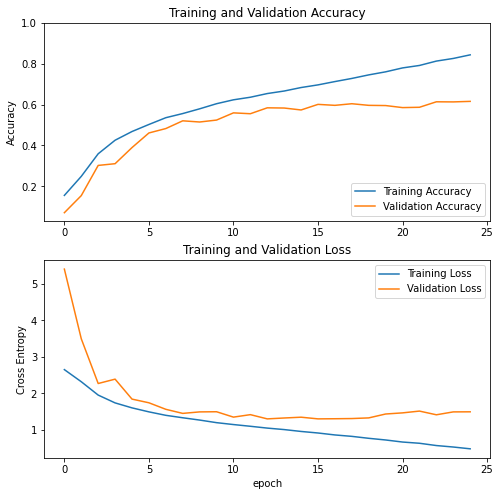

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()